# **Coding Task 1 - Kelompok 7 Kelas C**

#### Import Library dan Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats
import seaborn as sns

data = pd.read_excel(r'Dataset\Dataset.xlsx')

#### Menampilkan Informasi terkait Dataset

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            121 non-null    int64  
 1   Curah Hujan (mm)   121 non-null    float64
 2   Penjualan A (pcs)  121 non-null    int64  
 3   Penjualan B (pcs)  121 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


#### Menampilkan Dataset (5 data awal dan akhir)

In [77]:
data

,Tanggal,Curah Hujan (mm),Penjualan A (pcs),Penjualan B (pcs)
0,1,1.4,0,507
1,2,1.2,27,61
2,3,15.2,458,367
3,4,13.4,20,21
4,5,7.7,7,0
...,...,...,...,...
116,4,2.2,430,421
117,5,0.5,208,24
118,6,33.4,200,189
119,7,0.0,0,324


## Analisis Pemusatan Data (Mean, Median, Modus, dan Kuartil)

In [133]:
hasil = {}
for kolom in data.columns:
    if kolom != 'Tanggal':
        mean = data[kolom].mean()
        median = data[kolom].median()
        mode = data[kolom].mode()[0]
        q1 = data[kolom].quantile(0.25)
        q3 = data[kolom].quantile(0.75)
        
        hasil[kolom] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Q1': q1,
            'Q3': q3
        }

df_hasil = pd.DataFrame(hasil)
df_transpose_hasil = df_hasil.T
df_transpose_hasil

,Mean,Median,Mode,Q1,Q3
Curah Hujan (mm),14.259504,2.1,0.0,0.0,16.4
Penjualan A (pcs),131.834711,52.0,0.0,5.0,238.0
Penjualan B (pcs),205.545455,157.0,0.0,80.0,324.0


## Analisis Persebaran Data (Range, IQR, Variansi, Standar Deviasi, Skewness, dan Kurtosis)

In [76]:
hasil_persebaran = {}
for kolom in data.columns:
    if kolom != 'Tanggal':
        data_range = data[kolom].max() - data[kolom].min()
        q1 = data[kolom].quantile(0.25)
        q3 = data[kolom].quantile(0.75)
        iqr = q3 - q1
        skewness = data[kolom].skew()
        kurt = stats.kurtosis(data[kolom])
        variance = data[kolom].var()
        std_dev = data[kolom].std()
        
        hasil_persebaran[kolom] = {
            'Range': data_range,
            'IQR': iqr,
            'Variansi': variance,
            'Standar Deviasi': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurt
        }

df_hasil_persebaran = pd.DataFrame(hasil_persebaran).T
df_hasil_persebaran

,Range,IQR,Variansi,Standar Deviasi,Skewness,Kurtosis
Curah Hujan (mm),170.6,16.4,758.465596,27.540254,3.635598,15.849394
Penjualan A (pcs),458.0,233.0,20049.672452,141.596866,0.708652,-0.870290
Penjualan B (pcs),545.0,244.0,25627.250000,160.085134,0.601558,-0.831383


## Visualisasi Distribusi Frekuensi, Histogram, dan Poligon Frekuensi

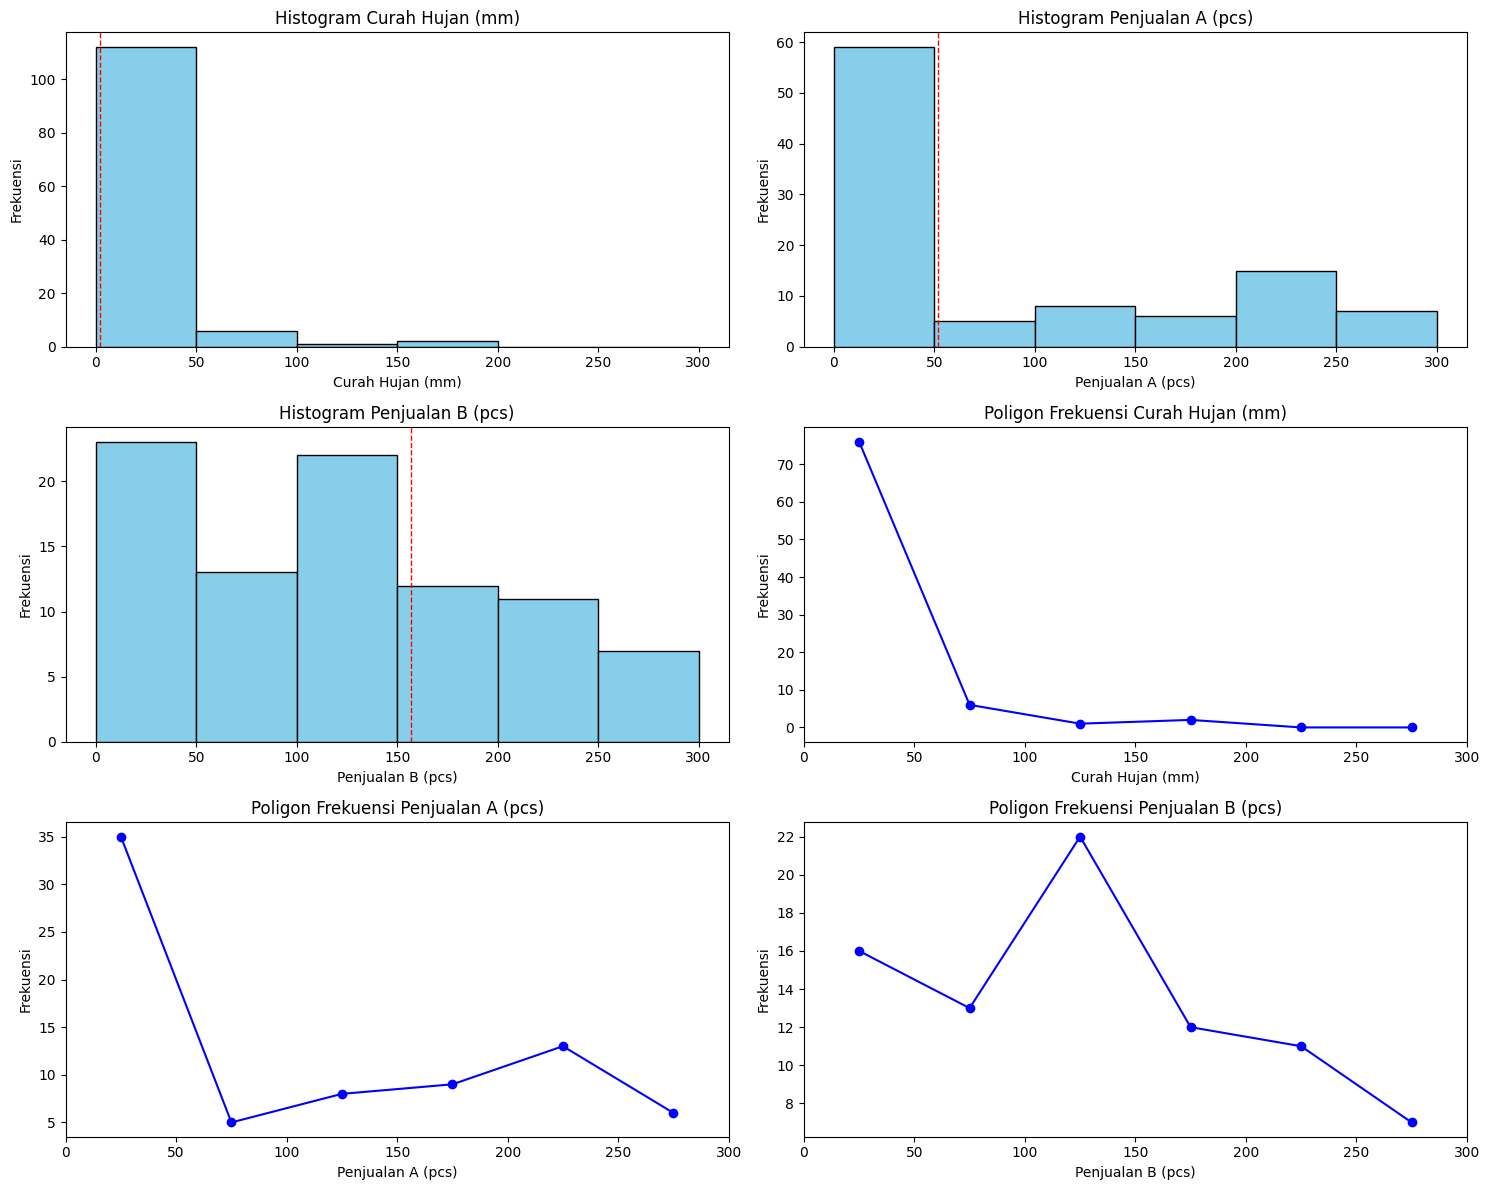

In [26]:
def frequency_distribution(kolom, bins):
        freq_table = pd.cut(kolom, bins=bins, right=True).value_counts().sort_index()
        return freq_table

plt.figure(figsize=(15, 12))

bins_hujan = [0, 5, 10, 15, 20, 25]
bins_penjualan = [0, 50, 100, 150, 200, 250, 300]

for i, kolom in enumerate(data.columns[1:], start=1):
        if 'hujan' in kolom:
            frekuensi = frequency_distribution(data[kolom], bins_hujan)
            bins = bins_hujan
        else:
            frekuensi = frequency_distribution(data[kolom], bins_penjualan)
            bins = bins_penjualan

        plt.subplot(3, 2, i)
        plt.hist(data[kolom], bins=bins, edgecolor='black', alpha=1, color='skyblue')
        plt.axvline(data[kolom].median(), color='red', linestyle='dashed', linewidth=1)
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.xticks(bins)

        plt.subplot(3, 2, i + 3)
        mid_bins = [(bins[j] + bins[j + 1]) / 2 for j in range(len(bins) - 1)]
        plt.plot(mid_bins, frekuensi.values, marker='o', linestyle='-', color='blue')
        plt.title(f'Poligon Frekuensi {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.xticks(bins)

plt.tight_layout()
plt.show()

## Menggabungkan Tabel Pemusatan Data dengan Persebaran Data

In [83]:
df_combined = pd.concat([df_transpose_hasil, df_hasil_persebaran], axis=1)
df_combined

,Mean,Median,Mode,Q1,Q3,Range,IQR,Variansi,Standar Deviasi,Skewness,Kurtosis
Curah Hujan (mm),14.259504,2.1,0.0,0.0,16.4,170.6,16.4,758.465596,27.540254,3.635598,15.849394
Penjualan A (pcs),131.834711,52.0,0.0,5.0,238.0,458.0,233.0,20049.672452,141.596866,0.708652,-0.870290
Penjualan B (pcs),205.545455,157.0,0.0,80.0,324.0,545.0,244.0,25627.250000,160.085134,0.601558,-0.831383


## Menghitung Outlier

In [139]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar kuartil (Interquartile Range)
    batas_bawah = Q1 - 1.5 * IQR  # Batas bawah untuk mendeteksi outlier
    batas_atas = Q3 + 1.5 * IQR  # Batas atas untuk mendeteksi outlier
    return df[(df[column] < batas_bawah) | (df[column] > batas_atas)]  # Mengembalikan baris yang merupakan outlier

# Deteksi outlier untuk Curah Hujan, Penjualan A, dan Penjualan B
outliers_hujan = detect_outliers_iqr(data, 'Curah Hujan (mm)')
outliers_penjualan_A = detect_outliers_iqr(data, 'Penjualan A (pcs)')
outliers_penjualan_B = detect_outliers_iqr(data, 'Penjualan B (pcs)')

# Hitung jumlah outlier untuk setiap kolom
outliers_counts = {
    'Jenis': ['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)'],
    'Outliers': [len(outliers_hujan), len(outliers_penjualan_A), len(outliers_penjualan_B)]
}

# Buat DataFrame untuk menampilkan tabel
outliers_df = pd.DataFrame(outliers_counts)
outliers_df

,Jenis,Outliers
0,Curah Hujan (mm),13
1,Penjualan A (pcs),0
2,Penjualan B (pcs),0


## Boxplot

**Boxplot** adalah alat yang menganalisis distribusi data. Fungsinya adalah untuk menunjukkan ringkasan statistik dari suatu dataset, seperti median, kuartil, dan outlier. Dengan boxplot, kita bisa dengan cepat melihat **_seberapa tersebarnya data, apakah ada nilai ekstrem (outlier), dan bagaimana data tersebut terdistribusi._** Ini sangat berguna saat kita ingin membandingkan beberapa kelompok data sekaligus.

Sementara itu, **histogram** lebih fokus pada distribusi frekuensi data. Ini menggambarkan seberapa sering nilai-nilai tertentu muncul dalam dataset, dengan membagi data ke dalam interval (atau "bin") dan menampilkan jumlah data dalam setiap interval tersebut. Jadi, meskipun boxplot memberikan gambaran ringkas tentang statistik kunci dan perbandingan antar grup, **_histogram memberikan detail lebih dalam tentang distribusi nilai dalam data._** Keduanya penting, tapi digunakan untuk tujuan yang berbeda.

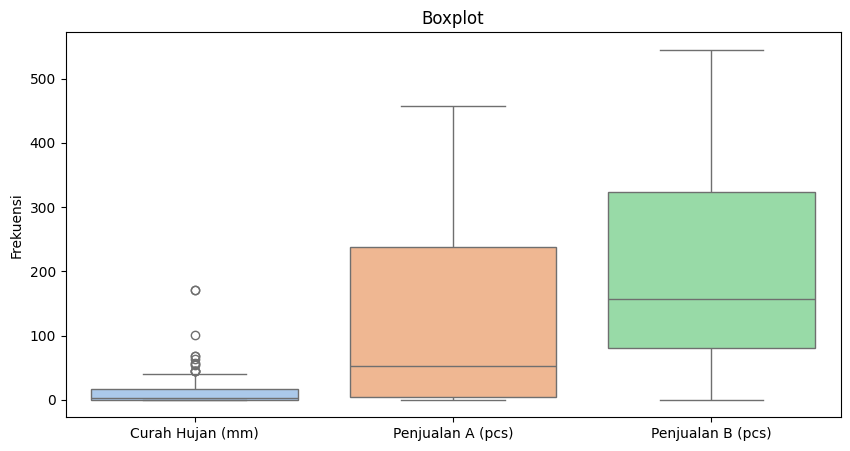

In [109]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data.drop('Tanggal', axis=1), palette='pastel')
plt.title('Boxplot')
plt.ylabel('Frekuensi')
plt.show()

Seperti visualisasi yang telah di tampilkan di atas, dapat dilihat bahwa untuk penjualan A dan B tidak memiliki outlier. Sedangkan untuk Curah hujan ia memiliki outlier.

#### Membersihkan Outliers

Outliers perlu dibersihkan karena bisa membuat hasil analisis data jadi tidak akurat. Berikut alasannya:
1. Nilai yang terlalu tinggi atau terlalu rendah (outliers) bisa membuat perhitungan seperti rata-rata menjadi tidak tepat.
2. Jika data yang ada outliers digunakan untuk membuat keputusan, hasilnya bisa menyesatkan karena outliers bukan cerminan kondisi normal data.
3. Dalam membuat model prediksi, outliers bisa mengganggu, sehingga prediksi jadi kurang tepat.
   
Jadi, dengan membersihkan outliers, kita bisa melihat pola data yang lebih jelas

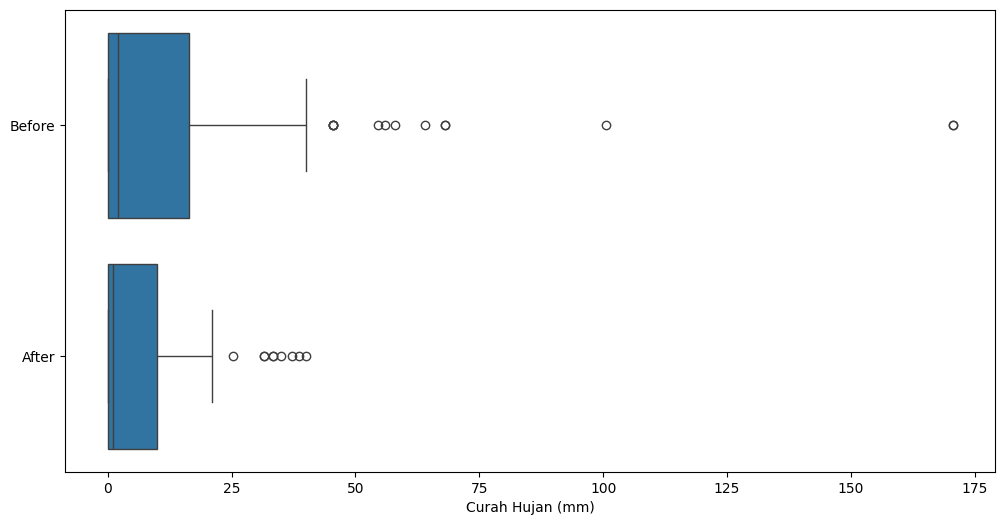

In [131]:
def remove_outliers(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bounds = Q1 - 1.5 * IQR
    upper_bounds = Q3 + 1.5 * IQR
    return df[(df[kolom] >= lower_bounds) & (df[kolom] <= upper_bounds)]

def create_comparison_boxplot(kolom):
    plt.figure(figsize=(12, 6))
    plot_data = pd.DataFrame({
        '': ['Before'] * len(data) + ['After'] * len(data_cleaned),
        kolom: pd.concat([data[kolom], data_cleaned[kolom]])
    })
    sns.boxplot(y='', x=kolom, data=plot_data)
    plt.xlabel(kolom)
    plt.show()

data_cleaned = data.copy()
for col in data_cleaned.columns:
    data_cleaned = remove_outliers(data_cleaned, col)
    
create_comparison_boxplot('Curah Hujan (mm)')

Setelah pembersihan, data curah hujan menunjukkan **_penyebaran yang lebih kecil dan lebih terpusat di nilai-nilai rendah._** Meskipun masih ada outliers, jumlah dan jaraknya relatif berkurang dibandingkan dengan sebelum pembersihan. Ini menunjukkan bahwa pembersihan data efektif dalam menyingkirkan data yang menyimpang dan membuat distribusi lebih teratur. Pembersihan data ini bermanfaat jika ingin mendapatkan hasil analisis yang lebih stabil dan kurang terpengaruh oleh nilai ekstrem.

# Kesimpulan
Setelah menganalisis dari dataset yang telah diberikan, maka dapat kita ambil kesimpulan
### Hasil Analisis Deskriptif
**1. Curah Hujan**
- Persebaran Data : Sebagian besar nilai rendah, banyak data 0 mm.
- Outliers        : Beberapa nilai ekstrem antara 50 mm hingga 170 mm.
- Distribusi      : Miring ke kanan, mayoritas data di sisi rendah.

**2. Penjualan A**
- Rata-rata: 131,83 pcs; variasi besar (standar deviasi 141,60 pcs).
- Outliers: Tidak ada outliers signifikan.
- Distribusi: Miring ke kanan, banyak penjualan di bawah 100 pcs, dengan beberapa mencapai 458 pcs.

**3. Penjualan B**
- Rata-rata: 205,55 pcs; variasi besar (standar deviasi 160,09 pcs).
- Outliers: Tidak ada outliers signifikan.
- Distribusi: Miring ke kanan, penjualan tinggi hingga 545 pcs lebih umum dibandingkan penjualan A.

### Kesimpulan Umum
- Distribusi Miring (Right-Skewed) terlihat di ketiga variabel (curah hujan, penjualan A, dan penjualan B), yang berarti sebagian besar data terkonsentrasi di nilai rendah dengan beberapa nilai yang jauh lebih tinggi.
- Outliers: Outliers hanya terlihat pada data curah hujan, sedangkan data penjualan A dan B tidak menunjukkan outliers yang signifikan.
- Persebaran Data: Penjualan A dan B memiliki persebaran data yang besar, dengan beberapa penjualan sangat tinggi. ​